## 노드7. 비지도학습
- 차원 축소
- 군집화(Clustering)

## 차원축소
- PCA(Principal Component Analysis) : 차원 축소 기법 중 대표적인 기법
    - 고차원에서 저차원으로 축소하는 선형 투영 기법

In [72]:
# 라이브러리 불러오기
import pandas as pd

In [73]:
# 와인 데이터 불러오기
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [74]:
# 데이터 샘플 확인
print(data.shape)
data.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### 스케일링

In [75]:
# 스탠다드 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

In [76]:
# 데이터 복사 (df 변수)
df = data.copy()

### PCA

In [77]:
# 라이브러리 불러오기
from sklearn.decomposition import PCA

In [78]:
# PCA
pca = PCA(n_components=2) # 몇 개로 줄일 건지?

In [79]:
# PCA 변환
df = pca.fit_transform(df)

In [80]:
# 데이터 크기 확인
df.shape

(178, 2)

In [81]:
# 샘플 데이터 확인
df[:3]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ]])

### PCA(2차원) 시각화

In [82]:
# 시각화 라이브러리
import matplotlib.pyplot as plt

In [83]:
# 데이터 프레임 변환
df = pd.DataFrame(df)
df.head()

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


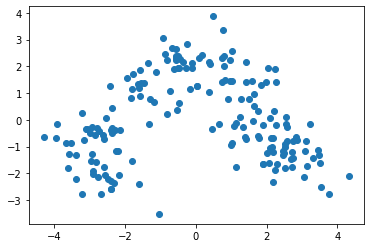

In [84]:
# scatter
plt.scatter(df.iloc[:,0], df.iloc[:, 1])

In [85]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

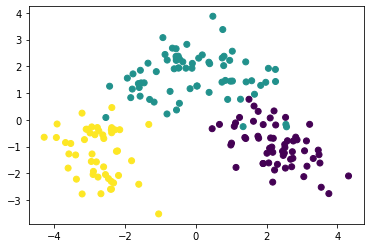

In [86]:
# scatter (c=target)
plt.scatter(df.iloc[:,0], df.iloc[:, 1], c=dataset.target)

In [87]:
# 데이터 설명(%)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.36198848 0.1920749 ]
0.5540633835693534


### 지도학습(PCA 전후 비교)

In [88]:
# PCA 후 데이터로 머신러닝 (2개 feature)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
print(cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean())

0.9492063492063492


In [89]:
# PCA 전 데이터로 머신러닝 (13개 feature)
print(cross_val_score(model, data, dataset.target, scoring='accuracy', cv=5).mean())

0.9553968253968254


### PCA(3차원) 시각화

In [90]:
# 새 데이터 복사
df = data.copy()

In [91]:
# pca (n_components=3)
pca = PCA(n_components=3)

In [92]:
# PCA 변환
df = pca.fit_transform(df)

In [95]:
# 데이터 프레임 변환
df = pd.DataFrame(df)

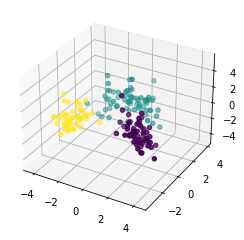

In [97]:
# 시각화 (3차원)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], c=dataset.target)

## 점진적 PCA
- 데이터 셋이 큰 경우 활용 (배치를 통햊 점진적 수행)

In [103]:
# 라이브러리 불러오기
from sklearn.decomposition import IncrementalPCA

In [104]:
# 데이터 복사
df = data.copy()

In [105]:
# 점진적 PCA
pca = IncrementalPCA(n_components=2, batch_size=16)

In [106]:
# 점진적 PCA 변환
df = pca.fit_transform(df)

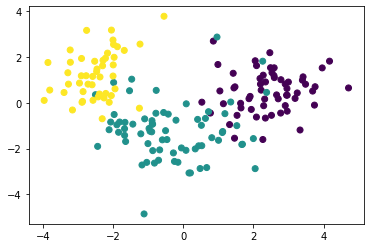

In [107]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:, 1], c=dataset.target)

In [108]:
# 데이터 설명(%)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.3400206  0.15239134]
0.49241194001543964


## 희소 PCA
- 적절한 희소성을 유지 (alpha 값으로 조정)
- 오버피팅 방지

In [111]:
# 라이브러리 불러오기
from sklearn.decomposition import SparsePCA

In [112]:
# 데이터 복사
df = data.copy()

In [113]:
# 희소 PCA
pca = SparsePCA(n_components=2, alpha=0.01)

In [114]:
# 희소 PCA 변환
df = pca.fit_transform(df)

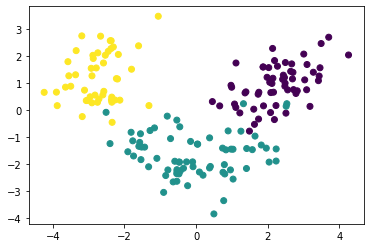

In [115]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:, 1], c=dataset.target)

## 커널 PCA
- 비선형으로 차원축소

In [120]:
# 라이브러리 불러오기
from sklearn.decomposition import KernelPCA

In [121]:
# 데이터 복사
df = data.copy()

In [122]:
# 커널 PCA
pca = KernelPCA(n_components=2)

In [123]:
# 커널 PCA 변환
df = pca.fit_transform(df)

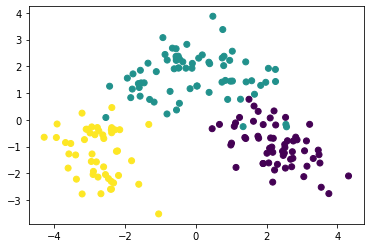

In [124]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:, 1], c=dataset.target)

### SVC(Singular Value Decomposition) 특이값 분해
- 행렬을 특정한 구조로 분해하는 방식
- 신호처리와 통계학 등의 분야에서 자주 사용됨

In [125]:
# 라이브러리 불러오기
from sklearn.decomposition import TruncatedSVD

In [126]:
# SVD 적용
df = data.copy()
svd = TruncatedSVD(n_components=2)
df = svd.fit_transform(df)

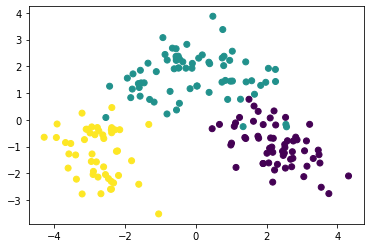

In [127]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:, 1], c=dataset.target)

## 군집(Clustering)
### 비계층적 군집분석
- 대표적인 방법 K-means
- K-평균군집(centroid), 임의의 지점 K개를 선택해 해당 중심에서 가까운 데이터를 군집화 하는 기법
- n_clusters 하이퍼파라미터 반드시 설정

In [42]:
# KMeans 라이브러리
from sklearn.cluster import KMeans

In [43]:
# 데이터 불러오기
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df = data.copy()

In [44]:
# Kmeans 선언 및 학습
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [46]:
# Kmeans 예측
pred = kmeans.predict(df)
pred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [47]:
# 실제값과 예측값 비교
df['target'] = dataset.target
df['pred'] = pred

#### PCA -> 군집 -> 시각화

In [50]:
# PCA
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
df.head()

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [52]:
# Kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
pred = kmeans.predict(df)
df['kmeans'] = pred
df

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,0,1,kmeans
0,318.562979,21.492131,2
1,303.097420,-5.364718,2
2,438.061133,-6.537309,2
3,733.240139,0.192729,2
4,-11.571428,18.489995,1
...,...,...,...
173,-6.980211,-4.541137,1
174,3.131605,2.335191,1
175,88.458074,18.776285,1
176,93.456242,18.670819,1


In [54]:
# 각 군집의 중심점
centers = kmeans.cluster_centers_

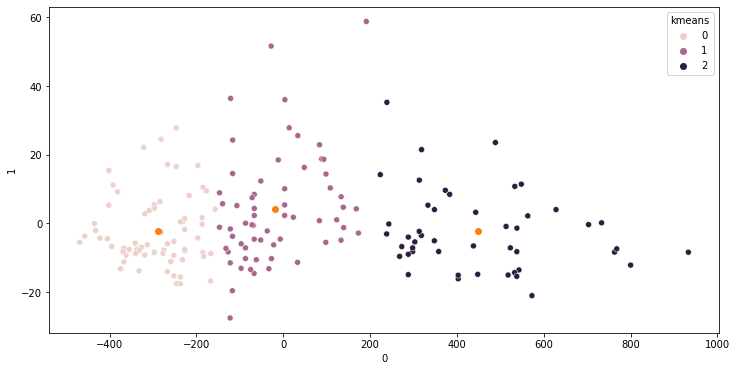

In [58]:
# 시각화
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=df['kmeans'])
plt.scatter(centers[:,0], centers[:,1])

클러스터 개수 찾는 방법 (elbow method)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklea

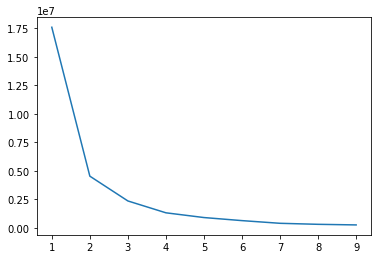

In [59]:
# 군집 수 찾기
inertia = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=2022)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 10), inertia)

### 계층적 군집분석
- k-means와 달리 군집 개수를 사전에 설정하지 않음
- 덴드로그램

In [60]:
# 덴드로그램
from scipy.cluster.hierarchy import dendrogram, ward

In [63]:
# PCA
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)

In [69]:
# 샘플링
kdata = df[:3].copy()
kdata = kdata.append(df[70:73])
kdata = kdata.append(df[160:163])
kdata

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
70,123.130138,1.059835
71,-337.104122,-7.623855
72,-275.096026,-7.753152
160,-227.068836,-7.618630
161,-66.755431,8.470290
162,-176.765098,9.473190


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [43.75, 43.75, 80.0, 80.0],
  [12.5, 12.5, 61.875, 61.875]],
 'dcoord': [[0.0, 30.991512411471362, 30.991512411471362, 0.0],
  [0.0, 147.877877959848, 147.877877959848, 30.991512411471362],
  [0.0, 48.02737852215087, 48.02737852215087, 0.0],
  [0.0, 88.07194000276101, 88.07194000276101, 48.02737852215087],
  [0.0, 135.87135248973354, 135.87135248973354, 88.07194000276101],
  [0.0, 190.03011431770972, 190.03011431770972, 0.0],
  [135.87135248973354,
   461.0158736911475,
   461.0158736911475,
   190.03011431770972],
  [147.877877959848, 1026.396544382853, 1026.396544382853, 461.0158736911475]],
 'ivl': ['2', '0', '1', '4', '8', '5', '6', '3', '7'],
 'leaves': [2, 0, 1, 4, 8, 5, 6, 3, 7],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C

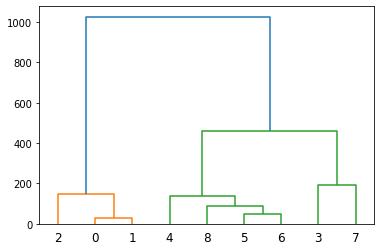

In [71]:
# 덴드로그램
linkage = ward(kdata) # 거리정보
dendrogram(linkage)

In [ ]:
# 검증
